In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set();

In [2]:
print pd.__version__

0.19.2


In [3]:
ls ../data/

coalpublic2004.xls  coalpublic2007.xls  coalpublic2010.xls  coalpublic2013.xls
coalpublic2005.xls  coalpublic2008.xls  coalpublic2011.xls
coalpublic2006.xls  coalpublic2009.xls  coalpublic2012.xls


In [4]:
df1 = pd.read_excel("../data/coalpublic2013.xls", header=2, index_col='MSHA ID')
df1.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [6]:
df1['Company Type'].unique()

array([u'Indepedent Producer Operator', u'Operating Subsidiary',
       u'Contractor'], dtype=object)

In [8]:
df1['Company Type'].replace(to_replace='Indepedent Producer Operator',
                           value='Independent Producer Operator',
                           inplace=True)

In [12]:
df1['Company Type'].unique()

array(['Independent Producer Operator', u'Operating Subsidiary',
       u'Contractor'], dtype=object)

In [15]:
df1.rename(columns=lambda x: x.replace(" ", "_").lower(), inplace=True)

In [17]:
df1.head()

,year,mine_name,mine_state,mine_county,mine_status,mine_type,company_type,operation_type,operating_company,operating_company_address,union_code,coal_supply_region,production_(short_tons),average_employees,labor_hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


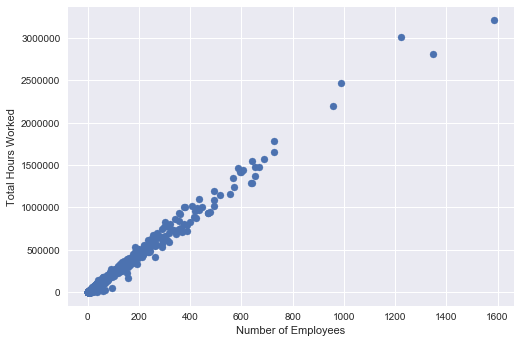

In [19]:
plt.scatter(df1.average_employees, df1.labor_hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

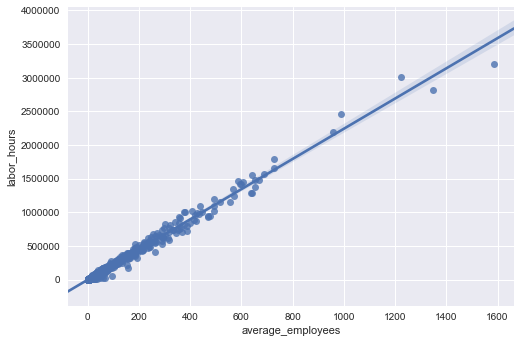

In [21]:
sns.regplot(df1.average_employees, df1.labor_hours)
plt.savefig("../figures/2017-03-14" + "-employees_vs_hours.png")

In [22]:
for column in df1.columns:
    print column

year
mine_name
mine_state
mine_county
mine_status
mine_type
company_type
operation_type
operating_company
operating_company_address
union_code
coal_supply_region
production_(short_tons)
average_employees
labor_hours


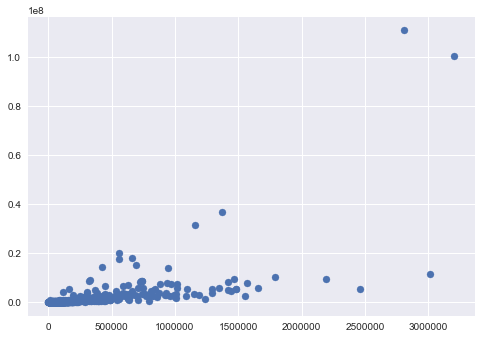

In [23]:
plt.scatter(df1.labor_hours, df1['production_(short_tons)'])

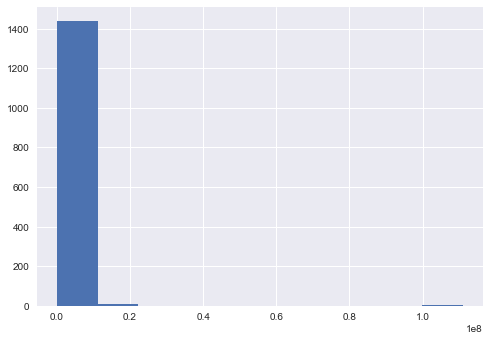

In [24]:
df1['production_(short_tons)'].hist()

In [37]:
# Only mines that produced coal
df2 = df1[df1['production_(short_tons)'] > 0]
print 'All Data: ' + str(len(df1))
print 'Only mines that produced coal: ' + str(len(df2))

All Data: 1450
Only mines that produced coal: 1061


In [39]:
df2.log_production = np.log(df2['production_(short_tons)'])

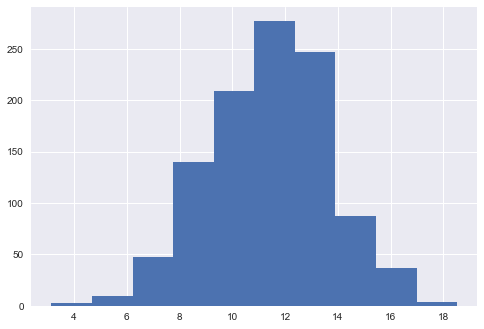

In [40]:
df2.log_production.hist()

In [42]:
# CSV for only mines that produced coal
df2.to_csv("../data/cleaned_coalpublic2013.csv")